By Can H. Tartanoglu

# Correctness

I chose bubble sort with worst case time-complexity $\mathcal{O}(n^2)$, and merge sort with time-complexity $\mathcal{O}(n\log{}n)$.

I checked their validity, by making sure the values in my input file was sorted correctly. I gave the following input:
```
5
10
3
2
1
30
```

# Comparisons, swaps, and time

I used `global` to change variables defined in the outer scope of the function. I had a variable for storing number of comparisons, and another for swaps. After storing the resulting metric values in the csv string, the variables were set to zero before the following sort function call.

# Experiment

The following is the result from benchmarking using a modified version of code written for sub-assignment 2. This allows me to work analyse the results with `pandas` + `seaborn` more efficiently.

I grouped the input files into `data-type`: `random` and `nearly_sorted`.

In [18]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv("result.csv", dtype={"cmp": int, "time": float}, index_col=0)
df

,n,data_type,algo,cmp,swap,time
0,10,nearly_sorted,merge,17,0,31.549
1,100,nearly_sorted,merge,335,0,259.114
2,1000,nearly_sorted,merge,5150,0,2805.671
3,10000,nearly_sorted,merge,67100,0,33765.665
4,100000,nearly_sorted,merge,841422,0,381822.228
5,1000000,nearly_sorted,merge,10108805,0,4290158.669
6,10,random,merge,22,0,8696.255
7,100,random,merge,549,0,282.408
8,1000,random,merge,8693,0,3747.560
9,10000,random,merge,120488,0,53961.353


## Overview

The algorithms I selected are quite similar, and don't perform any swaps. They also have identical time-complexities on average; demonstrated in the figure below.

Merge sort is very robust sorting algorithm that is $\mathcal{O}(n\log{}n)$ in every case because of its *naive-smart* design where I split the array in half in every recursion until the problem can't be split into smaller pieces—`size=1`. This is another reason

Quicksort is quite similar to merge sort with respect to array splitting, but the method has a *naive-dumb* foundation. I have to pick an arbitrary element from the sequence as the *pivot* point, which I use to split the array into two chunks where one stores less and, the other, greater than the pivot. This design had a downstream effect on its application in the benchmark, which I discuss next.

### Quicksort issue
One of the four "nearly_sorted" + "quicksort" ran out of memory when $n > 1000$. Below, I plot each scenario in its own sub-plot. I make this issue clear on the figure below, upper right plot, that only has the 10, 100, and 1000 defined.

This pitfall occurs when the pivot is often an extreme value in the sequence. This leads to an imbalance in the sequence split, which leads to the worst case of $\mathcal{O}(n^2)$. Looking into this with my IDE debugger it did seem this was the case. There is no deterministic solution to this problem; moreover, I could randomize the sequence, and run the sorting again where it most likely succeeds. I could also [randomize the pivot](https://stackoverflow.com/questions/164163/quicksort-choosing-the-pivot/), but this is outside the classical design of the algorithm; personally, I don't like the idea of using random number generators in an algorithm that alternatively have a deterministic implementation or even alternative.

### Plot

I plot the results from the four scenarios:
- "nearly_sorted" + "quicksort" (only upto 1000)
- "nearly_sorted" + "merge_sort"
- "random" + "quicksort"
- "random" + "merge_sort"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


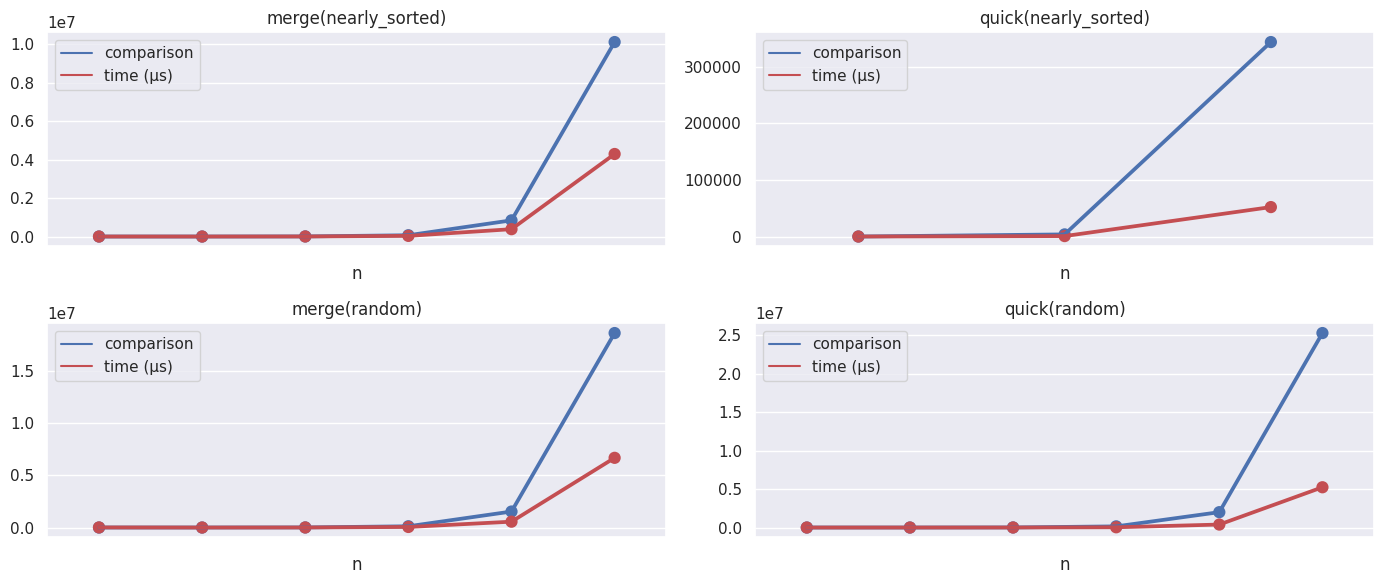

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
axes = axes.flatten()
sb.set_theme()

for ax, (group_name, sub_df) in zip(axes, df.groupby(by=["data_type", "algo"])):
	clp = sb.lineplot(sub_df, x="n", y="cmp", ax=ax, color="b", label="comparison")
	cpp = sb.pointplot(sub_df, x="n", y="cmp", ax=ax, color="b")

	tlp = sb.lineplot(sub_df, x="n", y="time", ax=ax, color="r", label="time (μs)")
	tpp = sb.pointplot(sub_df, x="n", y="time", ax=ax, color="r")

	plt.legend()

	ax.set_title(f"{group_name[1]}({group_name[0]})")
	for p in (clp, cpp, tlp, tpp):
		p.set(xticklabels=[])
		p.set(ylabel=None)

plt.tight_layout()
plt.show()

Merge sort is $\mathcal{O}(n\log{}n)$ every time; Quick sort is on average $\mathcal{O}(n\log{}n)$ and worst case $\mathcal{O}(n^2)$.

Lack of data in quick(nearly_sorted) makes analysis difficult; moreover, quick has worse time-complexity than its merge counterpart, which is discussed more in the next section.

### Differences

In [21]:
import numpy as np


def f(x: pd.DataFrame):
	x.set_index("algo", inplace=True)
	try:
		return pd.Series([x.loc["merge", "cmp"] - x.loc["quick", "cmp"], x.loc["merge", "time"] - x.loc["quick", "time"]], index=["cmp", "time"])
	except KeyError:
		return pd.Series([np.nan, np.nan], index=["cmp", "time"])

df.groupby(by=["data_type", "n"]).apply(f)

cmp         time
data_type     n                              
nearly_sorted 10           -11.0       12.854
              100        -3449.0     -548.665
              1000     -338932.0   -49305.204
              10000          NaN          NaN
              100000         NaN          NaN
              1000000        NaN          NaN
random        10            -6.0     8668.022
              100          -94.0      112.540
              1000       -1751.0     1454.266
              10000     -30355.0    21556.870
              100000   -463595.0   175169.779
              1000000 -6630229.0  1453471.600

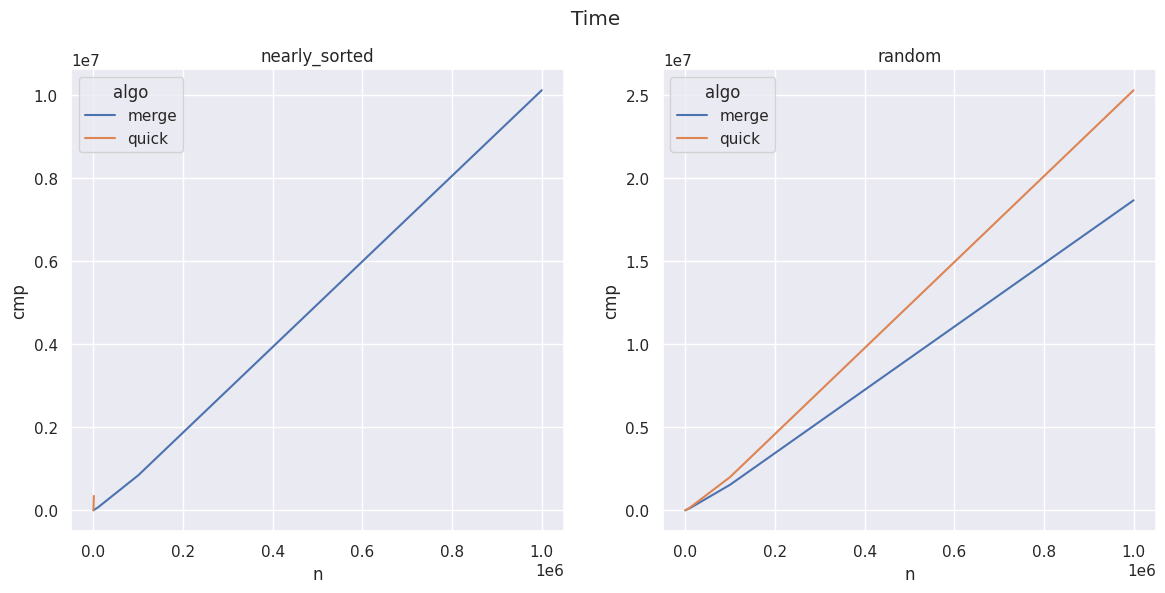

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
axes = axes.flatten()
sb.set_theme()

for ax, (group_name, sub_df) in zip(axes, df.groupby(by="data_type")):
	sb.lineplot(sub_df, x="n", y="cmp", hue="algo", color="b", ax=ax)
	ax.set_title(group_name)

fig.suptitle("Time")
plt.show()

Positive values indicate increased quantity on the merge sort side, negative on the quicksort side; less is better in terms of speed.

Quick sort does more comparisons than merge sort every time, but is also faster in every random scenario. Quick sort was also faster in a nearly-sorted scenario when n was low ($n=10$). It seems that merge sort would've beat quicksort in $n>1000$. I might've gotten it to work if I experimented with higher SWAP memory; however, it is unnecessary as the trend is clear from the difference computations above.

The plots being linear when the x-axis is an exponential is another proof that the respective algorithm is $\mathcal{O}(n\log{}n)$. This is the case except quick(nearly_sorted), which is closer to its worst case $\mathcal{O}(n^2)$.

## Conclusion
Merge sort is very useful for sequences that are nearly sorted, and quick sort is very useful for chaotic/random sequences. I could randomize the pivot to avoid the algorithmic catastrophy of quicksort.